In [9]:
from random import uniform, random, shuffle
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from mpl_toolkits import mplot3d

    
def rnum():
    return uniform(0, 1);
def rnum_exclusive():
    return random()

		#draw Triangle
square_side = 1.0
triangle_side = square_side / (((3)**(1/2) + 1) / (2 * (2)**(1/2)))
implicit_points = (triangle_side**2 - square_side**2)**(1/2)
tpA = [0,0]
tpB = [square_side, implicit_points]
tpC = [implicit_points, square_side]

            

In [8]:
def FSrandom(N, D):
    points = np.array(np.arange(D * N).reshape(N, D), dtype=float)
    for i in range(N):
        for j in range(D):
            points[i][j] = rnum()
    return points

In [7]:
def FSlfr(N, D):
    pointsMM = np.array(np.arange(N * D).reshape(N, D), dtype=float)
    # intervals = int(N**(1/D))
    intervals = N
    for k in range(intervals):
        for i in range(D):
            pointsMM[k][i] = (rnum_exclusive() * (1/intervals) + (1/intervals * k))
             
    for i in range(D):
        np.random.shuffle(pointsMM[:,i])
    return pointsMM
    
    


In [6]:

def distance(a,b):
    res = 0.0
    for d in range(len(a)):
        res += (a[d] - b[d]) * (a[d] - b[d])
    return res

def FSMaximin(N, D):
    pointsMM = np.array(np.arange(D * N).reshape(N, D), dtype=float)
    for row in pointsMM:
        for i in range(D):
            row[i] = rnum()

    iterations = 10000

    for i in range(iterations):
        index = int(random() * N)
        
        current_min = -1
        for j in range(N):
            if(index != j):
                dis = distance(pointsMM[index], pointsMM[j])
                if(current_min < 0 or dis < current_min):
                    current_min = dis
        canidate = np.array([rnum(), rnum()])
        canidate_min = -1
        for j in range(N):
            if(index != j):
                dis = distance(canidate, pointsMM[j])
                if(canidate_min < 0 or dis < canidate_min):
                    canidate_min = dis
                    
        if(canidate_min > current_min):
            pointsMM[index] = canidate
    return pointsMM
    
def FSSeqMaximin(N, D, past=None):
    pointsMM = np.array(np.arange(D * N).reshape(N, D), dtype=float)
    for row in pointsMM:
        for i in range(D):
            row[i] = rnum()

    iterations = 100000

    for i in range(iterations):
        index = int(random() * N)
        
        current_min = None
        canidate_min = None
        canidate = np.array([rnum(), rnum()])
        for j in range(N):
            if(index != j):
                dis = distance(pointsMM[index], pointsMM[j])
                dis_new = distance(canidate, pointsMM[j])
                current_min = min(current_min, dis) if current_min else dis
                canidate_min = min(canidate_min, dis_new) if canidate_min else dis_new
        if past is not None:
            for j in range(len(past)):
                dis = distance(canidate, past[j])
                canidate_min = min(canidate_min, dis) if canidate_min else dis
                        

        if(canidate_min > current_min):
            pointsMM[index] = canidate


    return pointsMM




In [12]:
# MM LHS
# Orthogonal LHS
#polars hyperspehre
#Potential Energy
#MST
#use libraries


In [5]:
def in_triangle(s,a,b,c):
	as_x = s[0]-a[0];
	as_y = s[1]-a[1];
	s_ab = (b[0]-a[0])*as_y-(b[1]-a[1])*as_x > 0;
	if((c[0]-a[0])*as_y-(c[1]-a[1])*as_x > 0 == s_ab):
		return False
	if((c[0]-b[0])*(s[1]-b[1])-(c[1]-b[1])*(s[0]-b[0]) > 0 != s_ab):
		return False
	return True

In [4]:
from queue import Queue 

def clamp(num, min_value, max_value):
   return max(min(num, max_value), min_value)

def evaluate_space(circles, radius, aP, bP, cP):
	accuracy = 10000
	dis = (accuracy)**(1/D)-1

	wastedpoints = 0
	totincircle = 0

	totpoints = 0
	usedpoints = 0

	ptsintriangle = 0
	totptsintriangle = 0

	points = np.zeros(D)

	# maxrun = int(dis)
	
	# while(True):
	# 	used = 0
	# 	totpoints += 1
	# 	for i in range(N):
	# 		cursum = 0.0
	# 		for d in range(D):
	# 			cursum += (circles[i][d] - (1 / maxrun * points[d]))**2
			
	# 		cursum = cursum**(1/2)
	# 		if(int(points[0]) == 1 and int(points[1] == 1)):
	# 			# print(points, circles[i], cursum)
	# 			pass
	# 		if(cursum <= radius):
	# 			used += 1
	# 	if(used > 0):
	# 		usedpoints += 1
	# 		wastedpoints += used - 1
	# 		totincircle += used

	# 	pointer = 0
	# 	while(pointer < D and points[pointer] == maxrun):
	# 		points[pointer] = 0
	# 		pointer += 1
			
	# 	if(pointer < D):
	# 		points[pointer] += 1
	# 	else:
	# 		break

	iterations = 100000

	for it in range(iterations):
		totpoints += 1
		for v in range(len(points)):
			points[v] = rnum()
		used = 0

		isInTriangle = in_triangle(points, aP, bP, cP)

		if(isInTriangle):
			totptsintriangle += 1

		for c in range(len(circles)):
			cursum = 0.0
			for d in range(D):
				cursum += (circles[c][d] - points[d])**2
			if(cursum <= radius * radius):
				used += 1
		if(used > 0):
			usedpoints += 1
			wastedpoints += used - 1
			totincircle += used
			if(isInTriangle):
				ptsintriangle += 1

	# print(usedpoints / totpoints)

	# partials = Queue()
	# next_partials = Queue()

	# partials.put(np.array(D * 0.0), np.array(D * 1.0))
	# resolution = 0.25

	# while(resolution > 1 / 10**6):
	# 	if(len(partials) == 0):
	# 		if(len(next_partials) > 0):
	# 			resolution /= 4
	# 			totpoints *= 4
	# 			usedpoints *= 4
	# 			totincircle *= 4
	# 			wastedpoints *= 4
	# 			partials = next_partials
	# 			next_partials = Queue()
	# 		else:
	# 			break
	# 	cur = partials.pop()

	# 	#is fully encapsulated
	# 	used = 0
	# 	usedpartial = 0
	# 	for c in range(len(circles)):
	# 		good = True
	# 		distance = 0.0
	# 		for d in range(D):
	# 			good &= circles[c][d] - radius >= cur[0][d] and circles[c][d] + radius <= cur[1][d]
	# 			distance += (clamp(circles[c][d], cur[0][d], cur[1][d]) - circles[c][d])**2
	# 		if(good):
	# 			used += 1
	# 		elif(distance <= radius * radius):
	# 			next_partials.put()
			
		


	spaceused = usedpoints / totpoints
	circlewasted = wastedpoints / totincircle
	overflow = 1 - spaceused / (N * 3.141592 * radius**2) - circlewasted
	triangle = ptsintriangle / totptsintriangle
	return [round(spaceused*100, 2), round(circlewasted * 100, 2), round(overflow * 100, 2), round(triangle * 100, 2)]	






In [3]:

def graph(points, num, name="", radius=0.1, color='red'):
	if(D == 2):	
		plt.figure(num)
		X = points[:,0]
		Y = points[:,1]
		plt.xlim([0, 1])
		
		plt.ylim([0,1])
		plt.xticks(np.linspace(0, 1, 11))
		plt.yticks(np.linspace(0, 1, 11))
		ax = plt.gca()
		ax.set_aspect('equal', adjustable='box')
		for i in range(len(X)):
			c = plt.Circle((X[i], Y[i]), radius, color='blue', alpha=0.2)
			ax.add_patch(c)
		plt.plot(X, Y, 'o', color=color)   
		plt.title(name)
		# plt.draw()
		# output_results(res)

		#draw Triangle
		triangle_X = np.array([tpA, tpB, tpC])
		triangle = plt.Polygon(triangle_X[:3,:], color='orange', alpha=0.3)

		res = evaluate_space(points, radius, [0, 0], [square_side, implicit_points], [implicit_points, square_side])

		plt.text(0, 1.12, 'Sq. A.: ' + str(res[0]) + '%')
		plt.text(0, 1.07, 'Sq A. Ovlap: ' + str(res[1]) + '%')
		plt.text(0, 1.02, 'Sq A. Ovflw: ' + str(res[2]) + '%')
		plt.text(0.8, 1.12, 'Tr. A. ' + str(res[3]) + '%')
		
		plt.gca().add_patch(triangle)

def output_results(res):
	print("Sq Area:", res[0],"%")
	print("Sq Overlap:", res[1],"%")
	print("Sq Waste:", res[2],"%")
	print("Triangle Area:", res[3],"%")


	

In [2]:
def run_average(N, D, radius, trials, name):
	results = None
	for i in range(trials):
		print("Running " + name + " Trial # " + str(i+1) + "/" + str(trials))
		res = None
		if name == 'Random':
			res = evaluate_space(FSrandom(N, D), radius, tpA, tpB, tpC)
		elif name == 'LHS':
			res = evaluate_space(FSlfr(N, D), radius, tpA, tpB, tpC)
		elif name == 'MM':
			res = evaluate_space(FSSeqMaximin(N, D), radius, tpA, tpB, tpC)
		elif name == 'Seq MM':
			res = evaluate_space(FSSeqMaximin(N, D, past=FSSeqMaximin(N, D)), radius, tpA, tpB, tpC)
		if res is not None:
			print("Trial Results: ", res)
			if results is not None:
				for j in range(len(results)):
					results[j] = (results[j] * i + res[j]) / (i+1)
			else:
				results = res
	print("=== FINAL RESULTS: " + name + " ===")
	output_results(results)

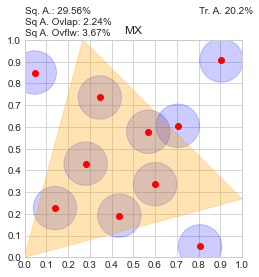

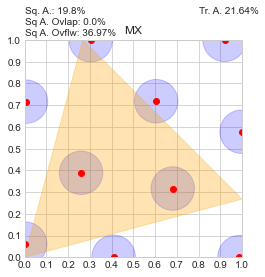

In [20]:
num = 0



# D = int(input("Dimensions: "))
# N = int(input("Point
# s:"))

D = 2
N = 10
radius = 0.1

# graph(FSMaximin(), num, name="LFR", radius=radius)
# num += 1

# graph(FSlfr(), num, name="LFR")
# num += 1
# a = FSSeqMaximin(N, D)
graph(FSlfr(N, D), num, name="MX", radius=radius); num += 1;
graph(FSSeqMaximin(N, D), num, name="MX", radius=radius); num += 1;

# b = FSSeqMaximin(5, D, past=a)

# graph(b, num, name="MX", radius=radius, color='green')
# num += 1
# graph(FSrandom(), num, name="Random")
# num += 1

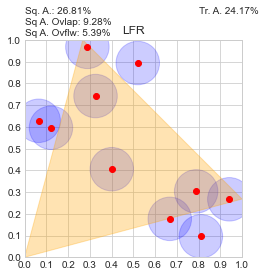

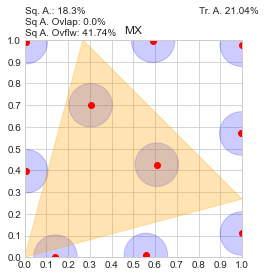

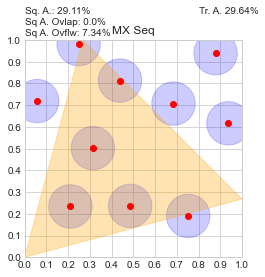

In [595]:
num =0
N = 10
radius = 0.1

graph(FSlfr(), num, name="LFR", radius=radius); num += 1;
a = FSSeqMaximin(N, D)
graph(a, num, name="MX", radius=radius); num += 1;
graph(FSSeqMaximin(N, D, past=a), num, name="MX Seq", radius=radius); num += 1;


In [615]:
radius = 0.1
N = 10
D = 2
run_average(N, D, radius, 5, 'MM'); print("\n\n")
run_average(N, D, radius, 5, 'LHS'); print("\n\n")
run_average(N, D, radius, 5, 'Random'); print("\n\n")
run_average(N, D, radius, 5, 'Seq MM'); print("\n\n")

Running MM Trial # 1/5
Trial Results:  [18.82, 0.0, 40.1, 19.22]
Running MM Trial # 2/5
Trial Results:  [19.13, 0.0, 39.11, 22.77]
Running MM Trial # 3/5
Trial Results:  [18.7, 0.0, 40.47, 20.64]
Running MM Trial # 4/5
Trial Results:  [18.14, 0.0, 42.27, 22.55]
Running MM Trial # 5/5
Trial Results:  [19.52, 0.0, 37.88, 22.25]
=== FINAL RESULTS: MM ===
Sq Area: 18.862000000000002 %
Sq Overlap: 0.0 %
Sq Waste: 39.966 %
Triangle Area: 21.485999999999997 %



Running LHS Trial # 1/5
Trial Results:  [30.11, 1.27, 2.89, 28.34]
Running LHS Trial # 2/5
Trial Results:  [30.09, 0.68, 3.55, 30.42]
Running LHS Trial # 3/5
Trial Results:  [27.45, 6.8, 5.83, 25.81]
Running LHS Trial # 4/5
Trial Results:  [28.3, 3.63, 6.3, 22.11]
Running LHS Trial # 5/5
Trial Results:  [27.0, 3.6, 10.47, 18.59]
=== FINAL RESULTS: LHS ===
Sq Area: 28.589999999999996 %
Sq Overlap: 3.1959999999999997 %
Sq Waste: 5.808 %
Triangle Area: 25.054000000000002 %



Running Random Trial # 1/5
Trial Results:  [26.4, 9.93, 6.03, 

ModuleNotFoundError: No module named 'pymoo'